# Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [110]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sqlite3
from sqlite3 import Error


In [111]:
# Import city_bikes from part 1
df1 = pd.read_csv('C:\\Users\\CFS\\Desktop\\Data analysis\\Python\Project_ Statistical-Modelling-with-Python\\Statistical-Modelling-with-Python\\notebooks\\city_bikes.csv')
df1.head()

,name,id,empty_slots,free_bikes,latitude,longitude,timestamp,extra.ebikes,extra.has_ebikes,extra.last_updated,extra.normal_bikes,extra.renting,extra.returning,extra.slots,extra.uid
0,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,2023-09-21 05:01:08.937000+00:00,0,True,1695272339,12,True,True,36,1
1,Yaletown-Roundhouse Station,32603a87cfca71d0f7dfa3513bad69d5,5,11,49.274566,-123.121817,2023-09-21 05:01:08.934000+00:00,2,True,1695272061,9,True,True,16,4
2,Dunsmuir & Beatty,6d42fa40360f9a6b2bf641c7b8bb2862,10,16,49.279764,-123.110154,2023-09-21 05:01:08.934000+00:00,0,True,1695272185,16,True,True,26,5
3,12th & Yukon (City Hall),66f873d641d448bd1572ab086665a458,12,4,49.260599,-123.113504,2023-09-21 05:01:08.936000+00:00,4,True,1695272311,0,True,True,16,7
4,8th & Ash,485d4d24c803cfde829ab89699fed833,14,2,49.264215,-123.117772,2023-09-21 05:01:08.941000+00:00,0,True,1695272244,2,True,True,16,8


In [112]:
# Import df_foursquare from part 2
df_foursquare = pd.read_csv('C:\\Users\\CFS\\Desktop\\Data analysis\\Python\Project_ Statistical-Modelling-with-Python\\Statistical-Modelling-with-Python\\notebooks\\df_foursquare.csv')
df_foursquare.head()


,latitude,longitude,station_id,name,popularity,rating,price,distance,fsq_id
0,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,0.978126,8.4,2.0,96,4b1db335f964a520211424e3
1,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,0.913264,8.5,2.0,164,4e223f06d4c0d32590f80ff4
2,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Whole Foods,0.996840,8.7,3.0,182,4aa73d25f964a520704c20e3
3,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Elysian Coffee Broadway,0.956118,8.1,1.0,225,4aa98676f964a520105420e3
4,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Menchies Frozen Yogurt,0.918632,8.2,1.0,258,4f0f9e5ee4b0725fea69f095


In [113]:
# Import df_yelp from part 2
df_yelp = pd.read_csv('C:\\Users\\CFS\\Desktop\\Data analysis\\Python\Project_ Statistical-Modelling-with-Python\\Statistical-Modelling-with-Python\\notebooks\\df_yelp.csv')
df_yelp.head()


,latitude,longitude,station_id,name,rating,price,distance,review_count,yelp_id
0,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg
1,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Saku,4.5,2.0,178.845344,226,XAH2HpuUUtu7CUO26pbs4w
2,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,4.0,2.0,102.329817,286,NensKn1MSVU_rm-1Y6WlFA
3,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,iDen & Quan Ju De Beijing Duck House,3.5,NaN,263.641336,106,Zi8Ywk36Ws_4zjw2gjMMFA
4,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Uma Sushi,4.5,3.0,152.157897,114,4118Aq9LbkvUr4s719uUkA


Cleaning before join datas

In [114]:
# Print all column each Dataframe
print(df1.columns)
print(df_foursquare.columns)
print(df_yelp.columns)

Index(['name', 'id', 'empty_slots', 'free_bikes', 'latitude', 'longitude',
       'timestamp', 'extra.ebikes', 'extra.has_ebikes', 'extra.last_updated',
       'extra.normal_bikes', 'extra.renting', 'extra.returning', 'extra.slots',
       'extra.uid'],
      dtype='object')
Index(['latitude', 'longitude', 'station_id', 'name', 'popularity', 'rating',
       'price', 'distance', 'fsq_id'],
      dtype='object')
Index(['latitude', 'longitude', 'station_id', 'name', 'rating', 'price',
       'distance', 'review_count', 'yelp_id'],
      dtype='object')


In [115]:
# Pick up columns that are relevant and remove columns unnecessary
# Drop off 'latitude', 'longitude', 'price' columns at df_foursquare and df_yelp
df_yelp.drop(['latitude', 'longitude',], axis=1, inplace= True)
df_foursquare.drop(['latitude', 'longitude'], axis=1, inplace= True)

# Drop off 'extra.has_ebikes', 'timestamp', 'extra.ebikes', 'extra.has_ebikes', 'extra.last_updated', 'extra.normal_bikes', 'extra.renting', 'extra.returning', 'extra.slots', 'extra.uid' columns
df2 = df1.copy()
df2 = pd.DataFrame(df2)
df2.drop(['extra.has_ebikes', 'timestamp', 'extra.ebikes', 'extra.last_updated', 'extra.normal_bikes', 'extra.renting', 'extra.returning', 'extra.slots', 'extra.uid'], axis=1, inplace=True)

In [116]:
# Remove duplicates
df2.drop_duplicates(inplace=True)
df_foursquare.drop_duplicates(inplace=True)
df_yelp.drop_duplicates(inplace=True)

# Drop rows where essential columns are NA
df1.dropna(subset=['id', 'latitude', 'longitude'], inplace=True)
df_foursquare.dropna(subset=['station_id'], inplace=True)
df_yelp.dropna(subset=['station_id'], inplace=True)

# Convert data types
df1['id'] = df1['id'].astype(str)
df_foursquare['station_id'] = df_foursquare['station_id'].astype(str)
df_yelp['station_id'] = df_yelp['station_id'].astype(str)

In [117]:
# CHeck missing values at df_yelp
cols_missing_vals = ['rating', 'price', 'distance','review_count']
(df_yelp[cols_missing_vals] == 0).sum()

rating          0
price           0
distance        0
review_count    0
dtype: int64

In [118]:
# CHeck missing values at df_foursquare
cols_missing_vals = ['popularity','rating', 'price'	,'distance']
(df_foursquare[cols_missing_vals] == 0).sum()

popularity    0
rating        0
price         0
distance      0
dtype: int64

In [119]:
# Check number of null at df_yelp
cols_missing_vals_yelp = ['review_count', 'rating', 'price', 'distance']
missing_values_count_yelp = df_yelp[cols_missing_vals_yelp].isnull().sum()
print(missing_values_count_yelp)

review_count      0
rating            0
price           539
distance          0
dtype: int64


In [120]:
#  Replace 'null' with median in specific 'price' column at df_yelp
df_yelp.dropna(subset=['price'], inplace=True)
median_value = df_yelp['price'].median()
df_yelp['price'].fillna(median_value, inplace=True)

In [121]:
# Check number of null
cols_missing_vals = ['popularity', 'rating', 'price', 'distance']
missing_values_count = df_foursquare[cols_missing_vals].isnull().sum()
print(missing_values_count)

popularity      0
rating         37
price         754
distance        0
dtype: int64


In [122]:
# Replace 'null' with median in specific 'price' column at df_foursquare
df_foursquare.dropna(subset=['price'], inplace=True)
median_value = df_foursquare['price'].median()
df_foursquare['price'].fillna(median_value, inplace=True)

# Replace 'null' with median in specific 'rating' column at df_foursquare
df_foursquare.dropna(subset=['rating'], inplace=True)
median_value = df_foursquare['rating'].median()
df_foursquare['rating'].fillna(median_value, inplace=True)

In [123]:
# Check both 'empty_slots' & 'free_bikes' == 0 at city bikes. If yes, remove row
filtered_df = df2[(df2['empty_slots'] == 0) & (df2['free_bikes'] == 0)]
print(filtered_df)

Empty DataFrame
Columns: [name, id, empty_slots, free_bikes, latitude, longitude]
Index: []


In [124]:
# Check both 'empty_slots' & 'free_bikes' isnull at city bikes. If yes, remove row
filtered_df = df2[df2['empty_slots'].isnull() & df2['free_bikes'].isnull()]
print(filtered_df)

Empty DataFrame
Columns: [name, id, empty_slots, free_bikes, latitude, longitude]
Index: []


In [125]:
# CHeck missing (NaN) values at city bikes
cols_missing_vals = ['empty_slots', 'free_bikes']
df2[cols_missing_vals].isnull().sum()

empty_slots    0
free_bikes     0
dtype: int64

(Use df2)Join city_bikes from part 1  to df_yelp from part 2 because:
        
        - df_yelp has more location-specific than df_Foursquare as I demonstrated in part 2.
        - POIs of df_yelp is more specific than df_Foursquare

In [126]:
# Merging df2 with df_yelp on 'station_id'
data = pd.merge(df2, df_yelp, how='inner', left_on='id', right_on='station_id')
data.head()

,name_x,id,empty_slots,free_bikes,latitude,longitude,station_id,name_y,rating,price,distance,review_count,yelp_id
0,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg
1,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Saku,4.5,2.0,178.845344,226,XAH2HpuUUtu7CUO26pbs4w
2,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,4.0,2.0,102.329817,286,NensKn1MSVU_rm-1Y6WlFA
3,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Uma Sushi,4.5,3.0,152.157897,114,4118Aq9LbkvUr4s719uUkA
4,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,4.0,2.0,191.044234,224,nkDZY5xqihF3XtZMzzfqqg


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [108]:
# Cleanning new database
# Removing 'id' column
data.drop('id', axis= 1, inplace= True)

In [109]:
# renaming column
data = data.rename(columns={'name_x': 'station_name', 'name_y': 'bars_restaurants' }).copy()
data.head()

,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,rating,price,distance,review_count,yelp_id
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg
1,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,4.0,2,102.329817,286,NensKn1MSVU_rm-1Y6WlFA
2,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Saku,4.5,2,178.845344,226,XAH2HpuUUtu7CUO26pbs4w
3,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Yolks,3.5,2,170.324037,350,bJKqZi70hu8g_ctZAAxtJw
4,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,4.0,2,191.044234,224,nkDZY5xqihF3XtZMzzfqqg


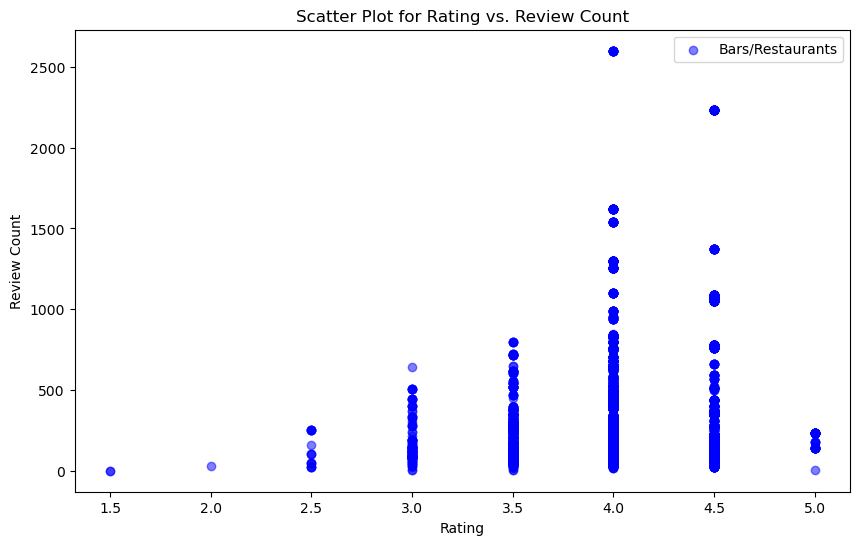

In [ ]:
# Scatter Plot: Rating vs. Review Count to see correlation
plt.figure(figsize=(10, 6))

plt.scatter(data['rating'], data['review_count'], c='blue', alpha=0.5, label='Bars/Restaurants')

plt.title('Scatter Plot for Rating vs. Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(loc='upper right')

plt.show()

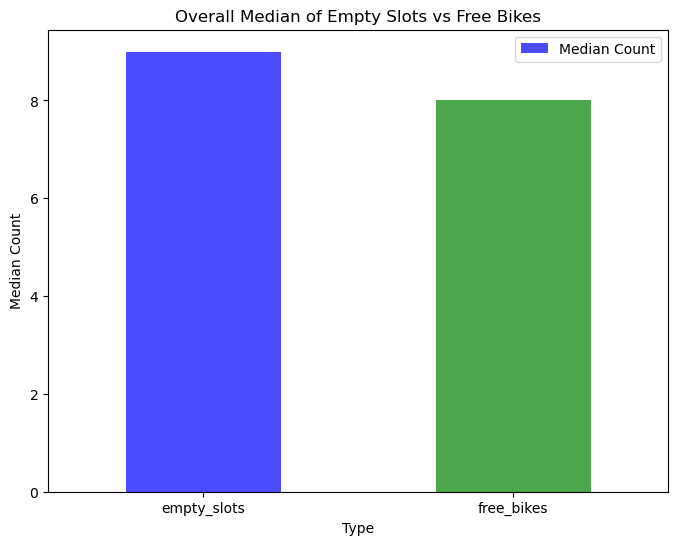

In [ ]:
# Creating a bar chart to display the median values for empty_slots and free_bikes to see correlation
medians = data[['empty_slots', 'free_bikes']].median()

# Create the bar graph
ax = medians.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'], alpha=0.7)

ax.set_ylabel('Median Count')
ax.set_xlabel('Type')
ax.set_title('Overall Median of Empty Slots vs Free Bikes')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.legend(["Median Count"])

plt.show()

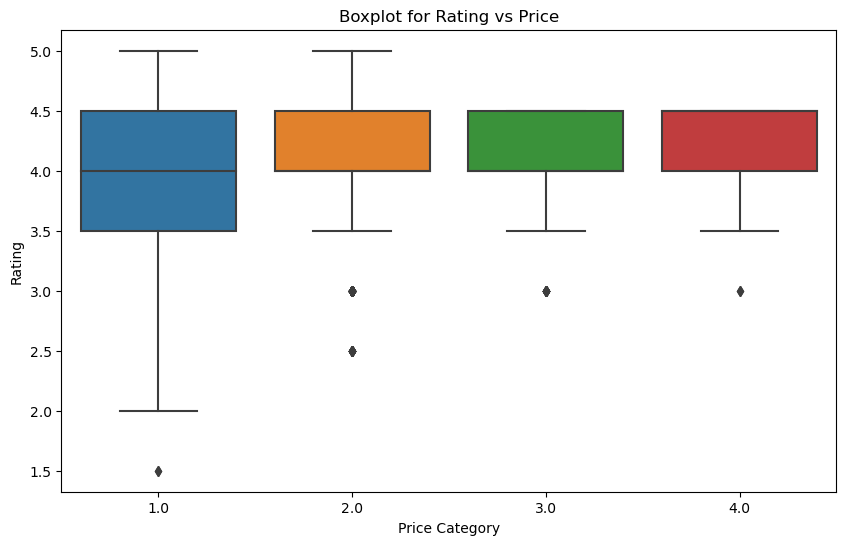

In [ ]:
# Creating boxplot for Rating vs Price to see correlation
dfbox = data[['price', 'rating']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='rating', data=dfbox)

plt.title('Boxplot for Rating vs Price')
plt.xlabel('Price Category')
plt.ylabel('Rating')
plt.show()

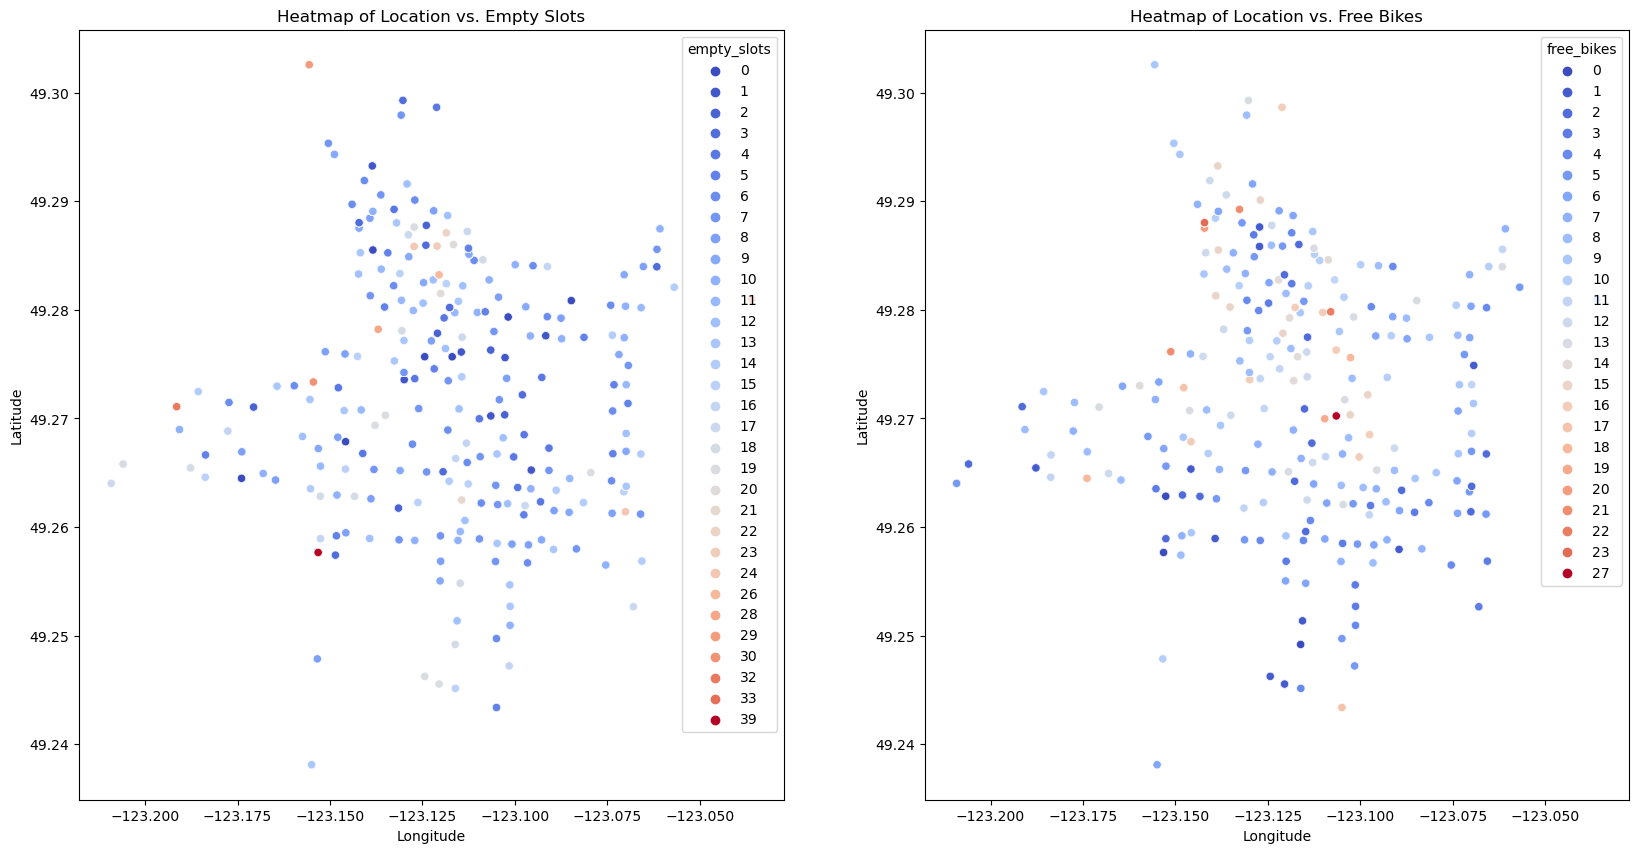

In [ ]:
# Create two subplots: one for 'empty_slots' and one for 'free_bikes' to see correlation between 'empty_slots', 'free_bikes' & location
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatterplot for empty_slots
sns.scatterplot(x='longitude', y='latitude', hue='empty_slots', palette='coolwarm', sizes=(20, 200), legend="full", data=data, ax=axes[0])
axes[0].set_title("Heatmap of Location vs. Empty Slots")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Scatterplot for free_bikes
sns.scatterplot(x='longitude', y='latitude', hue='free_bikes', palette='coolwarm', sizes=(20, 200), legend="full", data=data, ax=axes[1])
axes[1].set_title("Heatmap of Location vs. Free Bikes")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.show()

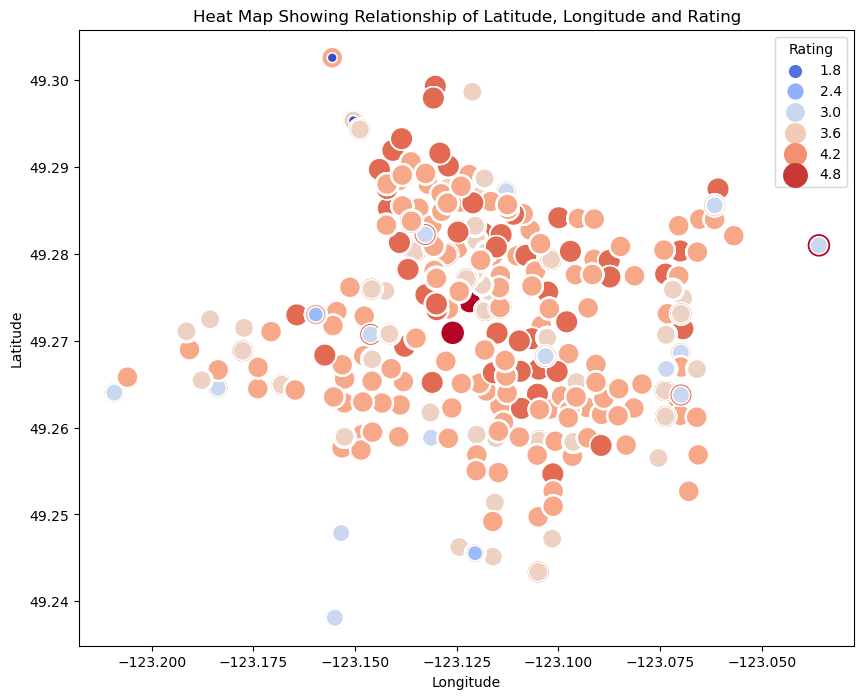

In [ ]:
# Showing Relationship of Latitude, Longitude, and Rating
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='rating', palette="coolwarm", size='rating', sizes=(50, 300), data=data)
plt.title('Heat Map Showing Relationship of Latitude, Longitude and Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Rating', loc='upper right')
plt.show()

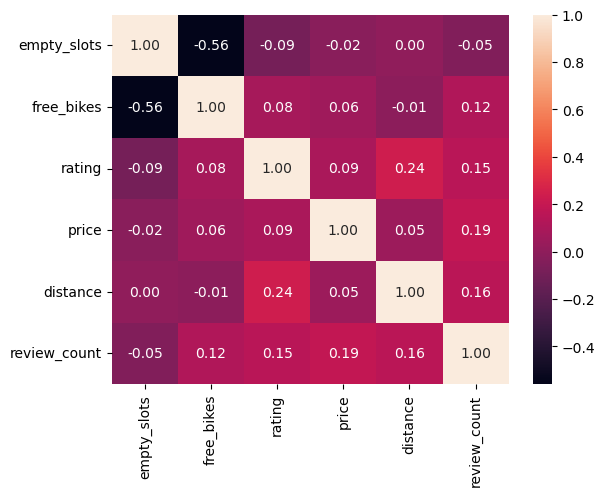

In [ ]:
# Compute the correlation matrix
corr = data[['empty_slots', 'free_bikes', 'rating', 'price', 'distance', 'review_count']].corr()

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\...\\data\\city_bikes_yelp.db') 

#Save DataFrame to SQLite table
data.to_sql('python_project', conn, if_exists='replace', index=False)

4329

In [ ]:
df_foursquare.to_sql('foursquare', conn, if_exists='replace', index=False)


1685

Look at the data before and after the join to validate your data.

In [ ]:
query = "SELECT * FROM python_project LIMIT 5"

# Execute the query and fetch results
result = pd.read_sql_query(query, conn)

result

,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,rating,price,distance,review_count,yelp_id
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg
1,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Saku,4.5,2.0,178.845344,226,XAH2HpuUUtu7CUO26pbs4w
2,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,4.0,2.0,191.044234,224,nkDZY5xqihF3XtZMzzfqqg
3,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,4.0,2.0,102.329817,286,NensKn1MSVU_rm-1Y6WlFA
4,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,Uma Sushi,4.5,3.0,152.157897,114,4118Aq9LbkvUr4s719uUkA


In [ ]:
# List All Tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)

             name
0  python_project
1      foursquare


In [ ]:
query = "SELECT bars_restaurants FROM python_project LIMIT 5"
result = pd.read_sql_query(query, conn)
print(result)

               bars_restaurants
0  La Taqueria Pinche Taco Shop
1                          Saku
2       Hokkaido Ramen Santouka
3                 Marulilu Cafe
4                     Uma Sushi


In [ ]:
query = "SELECT fsq_id FROM foursquare LIMIT 5"
result = pd.read_sql_query(query, conn)
print(result)

                     fsq_id
0  4b1db335f964a520211424e3
1  4e223f06d4c0d32590f80ff4
2  4aa73d25f964a520704c20e3
3  4aa98676f964a520105420e3
4  4f0f9e5ee4b0725fea69f095


In [ ]:
# Check different row of database and data
query = "SELECT yelp_id FROM python_project"
result = pd.read_sql_query(query, conn)

# Get the length of the result
diff_rows = len(result) - len(data)
print(f"The different rows between database and data is: {diff_rows}")

The different rows between database and data is: 0


In [ ]:
query = "SELECT fsq_id FROM foursquare LIMIT 5"
result = pd.read_sql_query(query, conn)
print(result)

                     fsq_id
0  4b1db335f964a520211424e3
1  4e223f06d4c0d32590f80ff4
2  4aa73d25f964a520704c20e3
3  4aa98676f964a520105420e3
4  4f0f9e5ee4b0725fea69f095


In [ ]:
# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\...\\data\\city_bikes_yelp.db')

# Write SQL query to join tables on 'station_id'
query = """
SELECT *
FROM python_project
JOIN foursquare
ON python_project.station_id = foursquare.station_id;
"""

# Execute query and load into a DataFrame
df_joined = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
df_joined.head()

,station_name,empty_slots,free_bikes,latitude,longitude,station_id,bars_restaurants,rating,price,distance,review_count,yelp_id,station_id,name,popularity,rating,price,distance,fsq_id
0,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg,7a19c49f486d7c0c02b3685d7b240448,Aperture Coffee Bar,0.925177,8.6,1.0,299,5177156c498ea4fd6b901dda
1,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg,7a19c49f486d7c0c02b3685d7b240448,Caffe Cittadella,0.950975,8.6,2.0,336,4c75baefdb52b1f7c5b979dc
2,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg,7a19c49f486d7c0c02b3685d7b240448,Elysian Coffee Broadway,0.956001,8.1,1.0,225,4aa98676f964a520105420e3
3,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg,7a19c49f486d7c0c02b3685d7b240448,Indian Roti Kitchen,0.892373,8.6,2.0,396,52ae4f3c11d227ba4f4b055a
4,10th & Cambie,21,12,49.262487,-123.114397,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,4.0,2.0,169.517456,681,6iOAgzJ0DRZNSKA3FSrrOg,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,0.913221,8.5,2.0,164,4e223f06d4c0d32590f80ff4
